In [ ]:
#lime,RFE, assembling-model verification
#vanue all same size
#wicket vs over scatter plot
#run vs ober scatter plot
#country barPlot


#Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/303Proj/odi.csv')
df.head()
#df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


#EDA

In [ ]:
df.shape

(350899, 15)

##Checking MissValues

In [ ]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [ ]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


##correlation

In [ ]:
#sns.heatmap(data, annot=True, cmap='coolwarm', square=True)
##
#sns.heatmap(df, cmap='coolwarm', annot=True)
#plt.show()
#df.corr()

In [ ]:
#here I extract Year, Month and Day from Date column
df['date']=pd.to_datetime(df['date'])
df['date'].dt.year
df['date'].dt.month
df['date'].dt.day
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.month


In [ ]:
df.corr()

<ipython-input-48-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day
mid,1.000000,0.038262,-0.023003,0.005770,0.065211,-0.003811,0.062887,0.038808,0.117010,0.983284,0.092776,0.092776
runs,0.038262,1.000000,0.598875,0.931473,0.647093,0.215938,0.572680,0.277120,0.316891,0.044493,-0.019952,-0.019952
wickets,-0.023003,0.598875,1.000000,0.756038,0.168192,0.492133,0.067412,-0.172466,-0.304311,-0.028208,0.015262,0.015262
overs,0.005770,0.931473,0.756038,1.000000,0.496190,0.242566,0.491282,0.208318,0.086654,0.006124,-0.003650,-0.003650
runs_last_5,0.065211,0.647093,0.168192,0.496190,1.000000,-0.021467,0.562481,0.439263,0.426608,0.076374,-0.032623,-0.032623
wickets_last_5,-0.003811,0.215938,0.492133,0.242566,-0.021467,1.000000,-0.207187,-0.468785,-0.191498,-0.006129,0.009058,0.009058
striker,0.062887,0.572680,0.067412,0.491282,0.562481,-0.207187,1.000000,0.542781,0.368623,0.070640,-0.020283,-0.020283
non-striker,0.038808,0.277120,-0.172466,0.208318,0.439263,-0.468785,0.542781,1.000000,0.321307,0.047876,-0.034071,-0.034071
total,0.117010,0.316891,-0.304311,0.086654,0.426608,-0.191498,0.368623,0.321307,1.000000,0.140008,-0.063281,-0.063281
year,0.983284,0.044493,-0.028208,0.006124,0.076374,-0.006129,0.070640,0.047876,0.140008,1.000000,-0.040363,-0.040363


#Data Preprocessing

In [ ]:
df["bat_team"].value_counts()

Australia               44876
Sri Lanka               42787
India                   33435
England                 32201
South Africa            31962
Pakistan                31658
New Zealand             30152
Bangladesh              23940
West Indies             23907
Zimbabwe                21179
Afghanistan              7564
Ireland                  7529
Scotland                 5968
Kenya                    2976
Canada                   2406
Netherlands              2178
United Arab Emirates     2006
Bermuda                  1768
Hong Kong                1189
Asia XI                   934
Papua New Guinea          284
Name: bat_team, dtype: int64

In [ ]:
#change teamm###
df["bowl_team"].value_counts()

India                   45141
Pakistan                33923
England                 32698
Sri Lanka               32468
Australia               31311
South Africa            29999
West Indies             29697
New Zealand             26242
Bangladesh              25131
Zimbabwe                23955
Ireland                 11194
Afghanistan              6562
Kenya                    4544
Canada                   4184
United Arab Emirates     3930
Scotland                 3245
Netherlands              2687
Hong Kong                1494
Bermuda                   948
Africa XI                 934
Papua New Guinea          612
Name: bowl_team, dtype: int64

In [ ]:
consistent_team = ['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa', 'New Zealand', 'Bangladesh', 'Zimbabwe','West Indies', 'India', 'Scotland','Afghanistan','Ireland']

In [ ]:
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]


In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301,2006,6,6
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301,2006,6,6
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301,2006,6,6
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301,2006,6,6
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301,2006,6,6


standard team

In [ ]:
sns.countplot(df, x=consistent_team)
plt.xlabel('count')
plt.ylabel('bat_team')
plt.title('Number of teams ')
plt.xticks(rotation=90)
plt.show()

venue


In [ ]:
df["venue"].value_counts()

Shere Bangla National Stadium                                                    23577
Harare Sports Club                                                               14883
R Premadasa Stadium                                                              11387
Queens Sports Club                                                                8980
Sheikh Zayed Stadium                                                              8196
                                                                                 ...  
Sharjah Cricket Association Stadium                                                303
Keenan Stadium                                                                     300
Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium      295
Sheikhupura Stadium                                                                291
ICC Academy                                                                        278
Name: venue, Length: 128, dtype: int64

In [ ]:
venues = df["venue"].value_counts()[df["venue"].value_counts() > 13000].index.tolist()##

In [ ]:
df = df[df["venue"].isin(venues)]


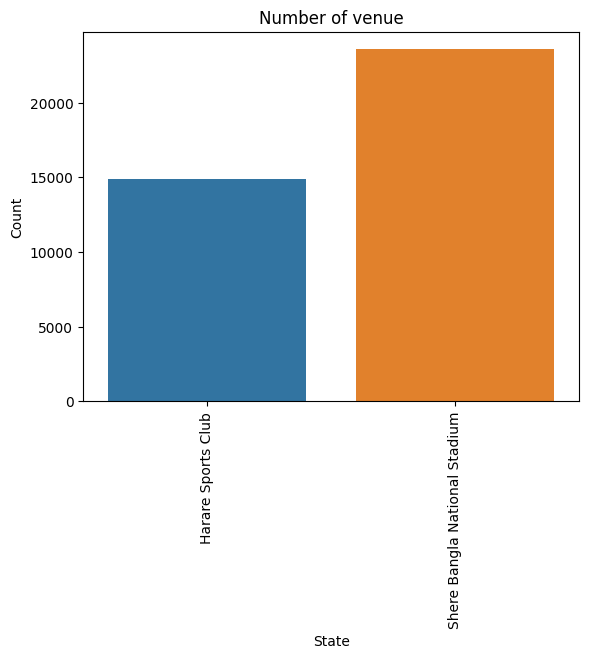

In [ ]:
sns.countplot(df, x='venue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of venue')
plt.xticks(rotation=90)
plt.show()

#wic left

In [ ]:
df["wickets_left"] = 10-df["wickets"]


In [ ]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day,wickets_left
31172,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,T Duffin,Syed Rasel,1,0,0.1,1,0,1,0,197,2006,8,8,10
31173,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.2,5,0,4,1,197,2006,8,8,10
31174,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.3,5,0,4,1,197,2006,8,8,10
31175,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.4,5,0,4,1,197,2006,8,8,10
31176,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.5,5,0,4,1,197,2006,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346248,1172,2017-02-21,Harare Sports Club,Zimbabwe,Afghanistan,MN Waller,Mohammad Nabi,123,9,31.6,16,4,35,0,129,2017,2,2,1
346249,1172,2017-02-21,Harare Sports Club,Zimbabwe,Afghanistan,CB Mpofu,Rashid Khan,124,9,32.1,15,4,35,1,129,2017,2,2,1
346250,1172,2017-02-21,Harare Sports Club,Zimbabwe,Afghanistan,MN Waller,Rashid Khan,125,9,32.2,16,4,36,1,129,2017,2,2,1
346251,1172,2017-02-21,Harare Sports Club,Zimbabwe,Afghanistan,CB Mpofu,Rashid Khan,129,9,32.3,18,4,36,1,129,2017,2,2,1


In [ ]:
#Ball_left

df["over"] = df["overs"].apply(lambda x: str(x).split(".")[0])
df["ball_no"] = df["overs"].apply(lambda x: str(x).split(".")[1])
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,wickets_last_5,striker,non-striker,total,year,month,day,wickets_left,over,ball_no
31172,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,T Duffin,Syed Rasel,1,0,0.1,...,0,1,0,197,2006,8,8,10,0,1
31173,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.2,...,0,4,1,197,2006,8,8,10,0,2
31174,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.3,...,0,4,1,197,2006,8,8,10,0,3
31175,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.4,...,0,4,1,197,2006,8,8,10,0,4
31176,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.5,...,0,4,1,197,2006,8,8,10,0,5


In [ ]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [ ]:
df['balls_left'] = 300 - df['balls_bowled']


In [ ]:
#appendRunRate

df["runrate"] = ((df["runs"]*6) / df["balls_bowled"])
df["runrate"]


31172      6.000000
31173     15.000000
31174     10.000000
31175      7.500000
31176      6.000000
            ...    
346248     3.843750
346249     3.854922
346250     3.865979
346251     3.969231
346252     3.948980
Name: runrate, Length: 38460, dtype: float64

In [ ]:
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,total,year,month,day,wickets_left,over,ball_no,balls_bowled,balls_left,runrate
31172,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,T Duffin,Syed Rasel,1,0,0.1,...,197,2006,8,8,10,0,1,1,299,6.0
31173,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.2,...,197,2006,8,8,10,0,2,2,298,15.0


mid

In [ ]:
##groups = df.groupby('mid')

#match_ids = df['mid'].unique()
#last_five = []
#for id in match_ids:
   # last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [ ]:
#df = df.groupby('mid').sum()['runs'].reset_index().merge(df,on='mid')

In [ ]:
df.head(4)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,total,year,month,day,wickets_left,over,ball_no,balls_bowled,balls_left,runrate
31172,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,T Duffin,Syed Rasel,1,0,0.1,...,197,2006,8,8,10,0,1,1,299,6.0
31173,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.2,...,197,2006,8,8,10,0,2,2,298,15.0
31174,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.3,...,197,2006,8,8,10,0,3,3,297,10.0
31175,105,2006-08-06,Harare Sports Club,Zimbabwe,Bangladesh,V Sibanda,Syed Rasel,5,0,0.4,...,197,2006,8,8,10,0,4,4,296,7.5


In [ ]:
df = (df[['mid','bat_team','bowl_team', 'venue','runs','balls_bowled','batsman','bowler','wickets_left','runrate','balls_left','runs_last_5', 'total','year' ]]).round(1)#######runrate'day
df.head(10)

,mid,bat_team,bowl_team,venue,runs,balls_bowled,batsman,bowler,wickets_left,runrate,balls_left,runs_last_5,total,year
31172,105,Zimbabwe,Bangladesh,Harare Sports Club,1,1,T Duffin,Syed Rasel,10,6.0,299,1,197,2006
31173,105,Zimbabwe,Bangladesh,Harare Sports Club,5,2,V Sibanda,Syed Rasel,10,15.0,298,5,197,2006
31174,105,Zimbabwe,Bangladesh,Harare Sports Club,5,3,V Sibanda,Syed Rasel,10,10.0,297,5,197,2006
31175,105,Zimbabwe,Bangladesh,Harare Sports Club,5,4,V Sibanda,Syed Rasel,10,7.5,296,5,197,2006
31176,105,Zimbabwe,Bangladesh,Harare Sports Club,5,5,V Sibanda,Syed Rasel,10,6.0,295,5,197,2006
31177,105,Zimbabwe,Bangladesh,Harare Sports Club,6,6,V Sibanda,Syed Rasel,10,6.0,294,6,197,2006
31178,105,Zimbabwe,Bangladesh,Harare Sports Club,7,7,V Sibanda,Farhad Reza,10,6.0,293,7,197,2006
31179,105,Zimbabwe,Bangladesh,Harare Sports Club,11,8,T Duffin,Farhad Reza,10,8.2,292,11,197,2006
31180,105,Zimbabwe,Bangladesh,Harare Sports Club,12,9,T Duffin,Farhad Reza,10,8.0,291,12,197,2006
31181,105,Zimbabwe,Bangladesh,Harare Sports Club,12,10,V Sibanda,Farhad Reza,10,7.2,290,12,197,2006


In [ ]:
new_df=df
new_df.isnull().sum()

mid             0
bat_team        0
bowl_team       0
venue           0
runs            0
balls_bowled    0
batsman         0
bowler          0
wickets_left    0
runrate         0
balls_left      0
runs_last_5     0
total           0
year            0
dtype: int64

In [ ]:
new_df.drop(["mid", "balls_bowled"], axis=1, inplace=True)

In [ ]:
new_df

,bat_team,bowl_team,venue,runs,batsman,bowler,wickets_left,runrate,balls_left,runs_last_5,total,year
31172,Zimbabwe,Bangladesh,Harare Sports Club,1,T Duffin,Syed Rasel,10,6.0,299,1,197,2006
31173,Zimbabwe,Bangladesh,Harare Sports Club,5,V Sibanda,Syed Rasel,10,15.0,298,5,197,2006
31174,Zimbabwe,Bangladesh,Harare Sports Club,5,V Sibanda,Syed Rasel,10,10.0,297,5,197,2006
31175,Zimbabwe,Bangladesh,Harare Sports Club,5,V Sibanda,Syed Rasel,10,7.5,296,5,197,2006
31176,Zimbabwe,Bangladesh,Harare Sports Club,5,V Sibanda,Syed Rasel,10,6.0,295,5,197,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
346248,Zimbabwe,Afghanistan,Harare Sports Club,123,MN Waller,Mohammad Nabi,1,3.8,108,16,129,2017
346249,Zimbabwe,Afghanistan,Harare Sports Club,124,CB Mpofu,Rashid Khan,1,3.9,107,15,129,2017
346250,Zimbabwe,Afghanistan,Harare Sports Club,125,MN Waller,Rashid Khan,1,3.9,106,16,129,2017
346251,Zimbabwe,Afghanistan,Harare Sports Club,129,CB Mpofu,Rashid Khan,1,4.0,105,18,129,2017


In [ ]:
#converts strings
df1 = pd.get_dummies( new_df, columns = ['bat_team','bowl_team', 'venue'])
import numpy as np
pd.np.random.seed(42)
df1 =new_df.sample(frac=1).reset_index(drop=True)

<ipython-input-108-44a75f6977a1>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.random.seed(42)


Heatmap of Features

<ipython-input-109-0bf2bd0e9fe7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt='.0%')


<Axes: >

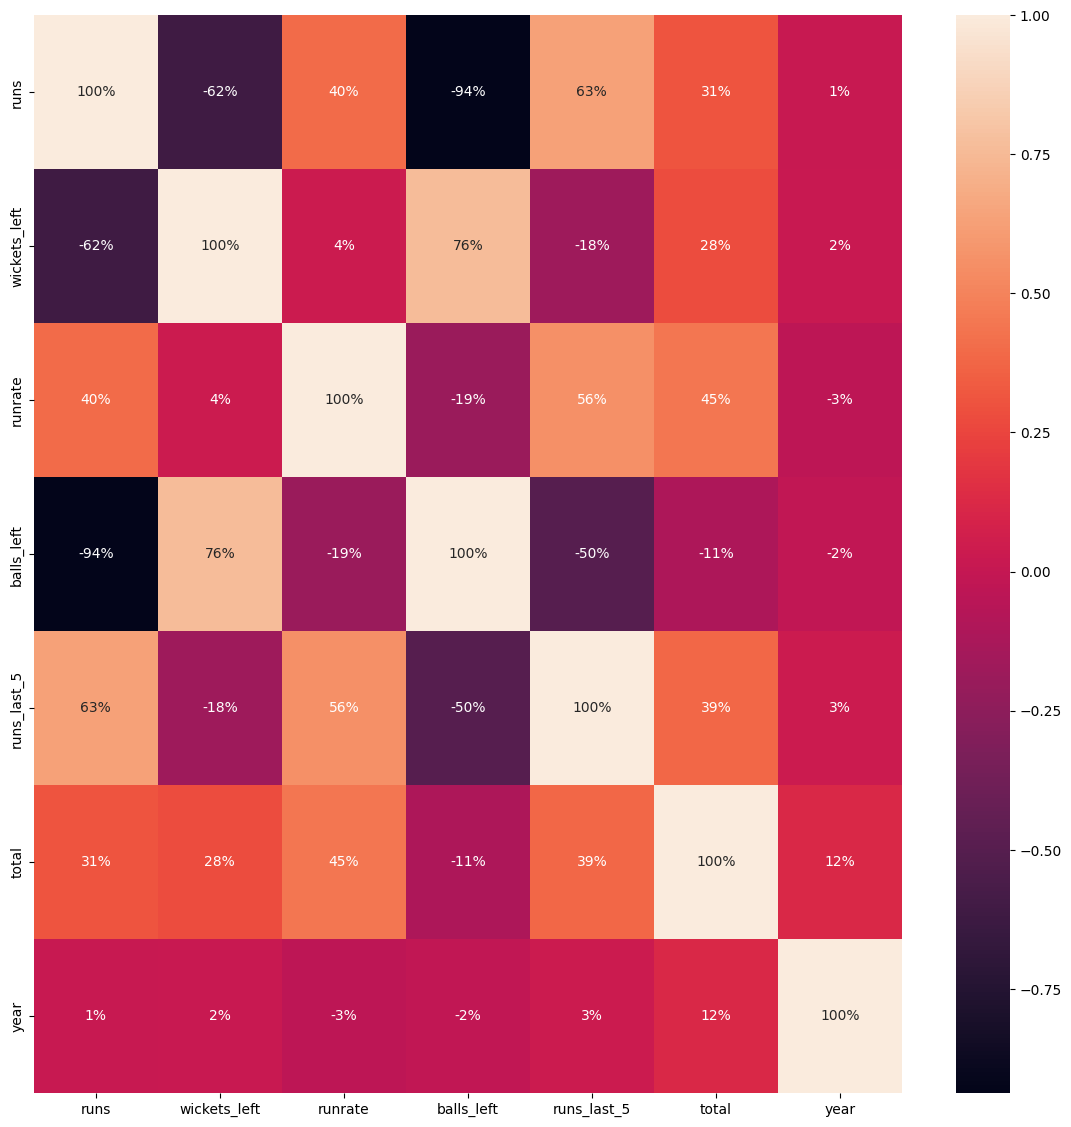

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

In [ ]:
# Use pandas get_dummies to perform one-hot encoding
df1 = pd.get_dummies(new_df, columns=['bat_team', 'bowl_team', 'venue','runrate','batsman','bowler'], drop_first=True)


In [ ]:
df1

,runs,wickets_left,balls_left,runs_last_5,total,year,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,...,bowler_WB Rankin,bowler_WD Parnell,bowler_WP Masakadza,bowler_Wahab Riaz,bowler_XJ Doherty,bowler_YK Pathan,bowler_YS Chahal,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan
31172,1,10,299,1,197,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31173,5,10,298,5,197,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31174,5,10,297,5,197,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31175,5,10,296,5,197,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31176,5,10,295,5,197,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346248,123,1,108,16,129,2017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346249,124,1,107,15,129,2017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346250,125,1,106,16,129,2017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346251,129,1,105,18,129,2017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df1.drop(["runrate"], axis=1, inplace=True)


#MODEL APPLY

In [ ]:
Y1 = df1.total
X1 = df1.drop('total', axis=1)

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

(30768, 747)
(7692, 747)


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = lr_model.predict(X_test)
y_predict

array([238.29433441, 182.58995533, 218.91589737, ..., 243.28602028,
       278.81693172, 203.03835297])

In [ ]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

-22804439534580.223

In [ ]:
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

0.7995791567190833

In [ ]:
# checking for scores
from sklearn import metrics

# checking for scores

from sklearn import metrics

import numpy as np
prediction = lr_model.predict(X_test)

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))



MAE:  3983959.8987759748
MSE:  7.282156102905942e+16
RMSE:  269854703.5518548
R2 Score:  -22804439534580.223


###Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 7.16891028e-01  1.21964979e+01  2.50555627e-01 -2.57278668e-02
  9.40493696e-01  4.00215361e+01 -0.00000000e+00  3.48397642e+01
  2.59446747e+01  0.00000000e+00  3.31764291e+00  1.50285193e+01
  4.36088633e+00 -1.63966083e+01  1.79140043e-01 -2.64967781e+01
  6.97278495e+00 -3.17334947e+00  2.35260114e-01  5.58980935e+00
 -4.69654274e+00  1.63362593e+01 -6.27278529e+00 -1.55814817e+01
 -3.84746915e+00  9.94736212e+00  3.16912963e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -4.41190130e+00 -0.00000000e+00 -5.09970492e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.49317330e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.68536866

In [ ]:
print(lasso.score(X_train, y_train))


0.6610947841038908


In [ ]:
print(lasso.score(X_test, y_test))

0.6597793737437313


In [ ]:
prediction = lasso.predict(X_test)

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))


MAE:  25.20471883927406
MSE:  1086.4286780955813
RMSE:  32.96101755249042
R2 Score:  0.6597793737437313


###ridge

In [ ]:
 ridge = Ridge(alpha=5)
 ridge.fit(X_train,y_train)
 print ("Ridge model:", (ridge.coef_))

Ridge model: [ 6.38181372e-01  1.03802149e+01  2.27393732e-01 -2.64000829e-01
  2.93909196e+00  5.78627497e+01  1.73984529e+01  5.51692521e+01
  5.00169824e+01  8.88975257e+00  1.75306556e+01  3.24328714e+01
  2.80928625e+01  3.69641165e+00  2.19496987e+01 -3.79664262e+00
  2.45110073e+01 -4.78092860e+00  7.20828298e+00  1.41703845e+01
 -1.12995605e+01  2.12645618e+01  4.18065767e+00 -9.76562479e+00
 -5.26981297e+00  1.62560209e+01  8.42903759e+00 -3.25311513e+00
 -3.81962234e+01 -2.12585519e+01 -1.52359253e+01 -2.44464264e+00
 -7.83431944e+00 -5.91560201e+00 -6.81674067e+00 -1.53985717e+01
 -7.39856822e+00 -1.20499145e+01 -5.05119042e+00 -2.81450499e+00
  6.86106365e+00  2.63822749e+00  3.03327747e-01  4.08970744e+00
  4.82085696e+00 -5.33450827e+00 -6.40948290e+00 -1.03670163e+01
 -1.45475050e+01 -4.68908048e+00 -5.27420592e+00 -1.66358824e+00
  3.15355205e+00  5.79959624e+00  4.97996072e+00  5.66155030e+00
 -3.14240555e-01 -1.09568210e+00 -1.93791573e+00  2.03112330e+00
  4.52473373

In [ ]:
 print(ridge.score(X_train, y_train))
 print(ridge.score(X_test, y_test))

0.7962473980819155
0.7926927533477124


In [ ]:
prediction = ridge.predict(X_test)

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))


MAE:  19.20125689256977
MSE:  661.99554218218
RMSE:  25.729274031386506
R2 Score:  0.7926927533477124


##Naive Bayes

###Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [ ]:
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.8475039001560063


In [ ]:
predictions = model.predict(X_train)

# Calculate accuracy
accuracy = np.sum(predictions == y_train) / len(y_train)

print('Accuracy:', accuracy)

Accuracy: 0.8633645345813833


In [ ]:


# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



print('R2 Score: ', metrics.r2_score(y_test, prediction))


MAE:  19.20125689256977
MSE:  661.99554218218
RMSE:  25.729274031386506
R2 Score:  0.7926927533477124


##random forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
#R2_train test
train_accuracy = r2_score(y_train, model2.predict(X_train))

print('Training r2:', train_accuracy)

Training r2: 0.9983409680872617


In [ ]:
test_accuracy = r2_score(y_test, model2.predict(X_test))

print('Test r2:', test_accuracy)

Test r2: 0.9901325686011291


In [ ]:
y_pred = model2.predict(X_test)
test = r2_score(y_test, y_pred)
print('Test r2:', test)

Test r2: 0.9901325686011291


In [ ]:
y_pred = model2.predict(X_train)
train = r2_score(y_train, y_pred)
print('train r2:', train)

train r2: 0.9983409680872617


In [ ]:
model2.score(X_train, y_train)

0.9983409680872617

In [ ]:
#RFE_takes too time dont run !
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor

# Load data


# Create a random forest regression model


# Create an RFE object
#rfe = RFE(model2, n_features_to_select=5)

# Fit the RFE object to the data
#rfe.fit(X_train,y_train)

# Get the ranking of the features
#ranking = rfe.ranking_

# Visualize the ranking of the features
#import matplotlib.pyplot as plt
#plt.bar(np.arange(len(ranking)), ranking)
#plt.xlabel('Feature rank')
#plt.ylabel('Importance')
#plt.title('Ranking of features by RFE')
#plt.show()

#ElasticNet

In [ ]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create the elastic net model
modelE = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Train the model
modelE.fit(X_train, y_train)

# Make predictions on the test set


ElasticNet(alpha=0.5)

In [ ]:
predictions = modelE.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)


r2 = r2_score(y_test, prediction)
print("test R-squire", r2)



MSE: 1438.589495509876
test R-squire 0.7926927533477124
